In [1]:
# GPU 사용 여부 확인
import tensorflow as tf
print(tf.__version__)
tf.config.list_physical_devices('GPU')

2.10.0


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# 머신러닝/딥러닝: 데이터의 법칙성을 추출
    - 다양한 분야에서 응용: 글씨인식, 문장분류, 질병진단, 얼굴식별, etc, ...
    - 지도학습(회귀, 분류) vs 비지도학습(군집), 강화학습(게임)
- 데이터 확보 및 생성(inputdata, outputdata)
- 데이터 전처리 (결측치, 스케일조정, 훈련데이터셋과 검증데이터셋, 시험데이터셋으로 분류 ...)
- 모델 구성
- 모델 학습 과정 설정(손실 함수, 옵티마이저, 평가지표)
- 모델 학습시키기
- 모델 평가(시험데이터셋으로)
- 모델 사용(모델 저장 후, 저장된 모델을 이용하여 입력값이 주어지면 예측값 받기)

# 1. 데이터 셋 생성
# 2. 데이터 전처리

In [2]:
import numpy as np
from tensorflow.keras.utils import to_categorical # 분류분석시 원핫인코딩
from tensorflow.keras.models import Sequential # 모델 생성
from tensorflow.keras.layers import Dense, Input # 모델에 레이어 추가시

In [3]:
# 학습데이터 == 훈련데이터
X_train = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9]*10)
Y_train = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18]*10)
# 검증데이터
X_val = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
Y_val = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18])

In [4]:
# 분류분석을 위한 인코딩 종류
data = np.array(['a', 'b', 'b', 'b', 'c'])
print('1. 원 데이터:', data)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labeling_data = le.fit_transform(data)
print('2. 라벨인코딩된 데이터:', labeling_data)
one_hot_encoding_data = to_categorical(labeling_data)
print('3. 원핫인코딩된 데이터(keras)\n', one_hot_encoding_data)

1. 원 데이터: ['a' 'b' 'b' 'b' 'c']
2. 라벨인코딩된 데이터: [0 1 1 1 2]
3. 원핫인코딩된 데이터(keras)
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [5]:
# 분류분석을 위한 원핫인코딩 방법
data = np.array([1, 2, 2, 4, 2])
print('원 데이터:', data)
categorical_one_hot = to_categorical(data)
print('to_categorical을 이용한 원 핫 인코딩:\n', categorical_one_hot) # 0 ~ 가장 큰 숫자까지 Group 생성
import pandas as pd
display('get_dummies를 이용한 원 핫 인코딩(데이터프레임):\n', pd.get_dummies(data))

원 데이터: [1 2 2 4 2]
to_categorical을 이용한 원 핫 인코딩:
 [[0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]]


'get_dummies를 이용한 원 핫 인코딩(데이터프레임):\n'

,1,2,4
0,1,0,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0


In [6]:
Y_train[:2], Y_val[:2]

(array([2, 4]), array([2, 4]))

In [7]:
# 분류분석을 위해 종속변수(target 변수)를 원핫인코딩
Y_train = to_categorical(Y_train, 19) # 숫자 범위 0 ~ 18만큼 Group 생성
Y_val = to_categorical(Y_val)

In [8]:
Y_train[:2]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]], dtype=float32)

In [9]:
X_train.shape, Y_train.shape, X_val.shape, Y_val.shape

((90,), (90, 19), (9,), (9, 19))

In [10]:
X_train[:2]

array([1, 2])

In [11]:
Y_train[:2]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]], dtype=float32)

# 3. 모델 구성

In [12]:
model = Sequential()
model.add(Input(shape = (1, )))
# units: 출력수, activation: 활성화 함수
model.add(Dense(units = 38,             
                activation = 'sigmoid')) # 2 X 38
model.add(Dense(units = 64,
                activation = 'elu'))     # 39 X 64
model.add(Dense(units = 32,
                activation = 'elu'))     # 65 X 32
model.add(Dense(units = 19,
                activation = 'softmax')) # 33 X 19
# activation = 'softmax': 모든 출력의 합이 1, 분류분석의 마지막 layer에서 activation 함수로 사용
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 38)                76        
                                                                 
 dense_1 (Dense)             (None, 64)                2496      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 19)                627       
                                                                 
Total params: 5,279
Trainable params: 5,279
Non-trainable params: 0
_________________________________________________________________
None


# 4. 모델 학습과정 설정
- 손실함수, 옵티마이저, 평가지표
    * loss = 'categorical_crossentropy': 딥러닝 훈련 시 다중분류분석에서의 손실함수
        * 모델의 예측 확률분포와 실제값의 확률분포가 얼마나 다른지 계산
    * metrics = ['accuracy']: 정확도

In [13]:
model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adam',
              metrics   = ['accuracy'])

# 5. 모델 학습시키기

In [14]:
hist = model.fit(X_train, Y_train, # 훈련(학습)데이터 
                 epochs     = 300, # 학습 횟수
                 batch_size = 10,  # 가중치를 조정하는 단위
                 verbose    = 2,   # 0: 출력없음, 1: 진행상황만 출력, 2:epoch별 로그메세지
                 validation_data = (X_val, Y_val), # 검증 데이터셋
                )

Epoch 1/300
9/9 - 1s - loss: 2.9531 - accuracy: 0.1222 - val_loss: 2.7356 - val_accuracy: 0.1111 - 1s/epoch - 139ms/step
Epoch 2/300
9/9 - 0s - loss: 2.6492 - accuracy: 0.1444 - val_loss: 2.5444 - val_accuracy: 0.2222 - 66ms/epoch - 7ms/step
Epoch 3/300
9/9 - 0s - loss: 2.4896 - accuracy: 0.2222 - val_loss: 2.3937 - val_accuracy: 0.2222 - 64ms/epoch - 7ms/step
Epoch 4/300
9/9 - 0s - loss: 2.3453 - accuracy: 0.2222 - val_loss: 2.2689 - val_accuracy: 0.2222 - 62ms/epoch - 7ms/step
Epoch 5/300
9/9 - 0s - loss: 2.2282 - accuracy: 0.2222 - val_loss: 2.1601 - val_accuracy: 0.2222 - 59ms/epoch - 7ms/step
Epoch 6/300
9/9 - 0s - loss: 2.1276 - accuracy: 0.2222 - val_loss: 2.0639 - val_accuracy: 0.2222 - 59ms/epoch - 7ms/step
Epoch 7/300
9/9 - 0s - loss: 2.0316 - accuracy: 0.2222 - val_loss: 1.9787 - val_accuracy: 0.2222 - 61ms/epoch - 7ms/step
Epoch 8/300
9/9 - 0s - loss: 1.9499 - accuracy: 0.2222 - val_loss: 1.9003 - val_accuracy: 0.2222 - 62ms/epoch - 7ms/step
Epoch 9/300
9/9 - 0s - loss: 1.8

Epoch 69/300
9/9 - 0s - loss: 0.2914 - accuracy: 1.0000 - val_loss: 0.2813 - val_accuracy: 1.0000 - 62ms/epoch - 7ms/step
Epoch 70/300
9/9 - 0s - loss: 0.2910 - accuracy: 1.0000 - val_loss: 0.2756 - val_accuracy: 1.0000 - 64ms/epoch - 7ms/step
Epoch 71/300
9/9 - 0s - loss: 0.2706 - accuracy: 1.0000 - val_loss: 0.2631 - val_accuracy: 1.0000 - 59ms/epoch - 7ms/step
Epoch 72/300
9/9 - 0s - loss: 0.2780 - accuracy: 1.0000 - val_loss: 0.2603 - val_accuracy: 1.0000 - 59ms/epoch - 7ms/step
Epoch 73/300
9/9 - 0s - loss: 0.2703 - accuracy: 1.0000 - val_loss: 0.2572 - val_accuracy: 1.0000 - 64ms/epoch - 7ms/step
Epoch 74/300
9/9 - 0s - loss: 0.2464 - accuracy: 1.0000 - val_loss: 0.2403 - val_accuracy: 1.0000 - 64ms/epoch - 7ms/step
Epoch 75/300
9/9 - 0s - loss: 0.2393 - accuracy: 1.0000 - val_loss: 0.2348 - val_accuracy: 1.0000 - 64ms/epoch - 7ms/step
Epoch 76/300
9/9 - 0s - loss: 0.2313 - accuracy: 1.0000 - val_loss: 0.2170 - val_accuracy: 1.0000 - 63ms/epoch - 7ms/step
Epoch 77/300
9/9 - 0s - 

Epoch 136/300
9/9 - 0s - loss: 0.0278 - accuracy: 1.0000 - val_loss: 0.0271 - val_accuracy: 1.0000 - 83ms/epoch - 9ms/step
Epoch 137/300
9/9 - 0s - loss: 0.0271 - accuracy: 1.0000 - val_loss: 0.0264 - val_accuracy: 1.0000 - 76ms/epoch - 8ms/step
Epoch 138/300
9/9 - 0s - loss: 0.0266 - accuracy: 1.0000 - val_loss: 0.0257 - val_accuracy: 1.0000 - 76ms/epoch - 8ms/step
Epoch 139/300
9/9 - 0s - loss: 0.0261 - accuracy: 1.0000 - val_loss: 0.0251 - val_accuracy: 1.0000 - 78ms/epoch - 9ms/step
Epoch 140/300
9/9 - 0s - loss: 0.0252 - accuracy: 1.0000 - val_loss: 0.0246 - val_accuracy: 1.0000 - 73ms/epoch - 8ms/step
Epoch 141/300
9/9 - 0s - loss: 0.0247 - accuracy: 1.0000 - val_loss: 0.0238 - val_accuracy: 1.0000 - 73ms/epoch - 8ms/step
Epoch 142/300
9/9 - 0s - loss: 0.0238 - accuracy: 1.0000 - val_loss: 0.0231 - val_accuracy: 1.0000 - 83ms/epoch - 9ms/step
Epoch 143/300
9/9 - 0s - loss: 0.0231 - accuracy: 1.0000 - val_loss: 0.0225 - val_accuracy: 1.0000 - 78ms/epoch - 9ms/step
Epoch 144/300
9/

Epoch 203/300
9/9 - 0s - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.0069 - val_accuracy: 1.0000 - 76ms/epoch - 8ms/step
Epoch 204/300
9/9 - 0s - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.0068 - val_accuracy: 1.0000 - 65ms/epoch - 7ms/step
Epoch 205/300
9/9 - 0s - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.0067 - val_accuracy: 1.0000 - 71ms/epoch - 8ms/step
Epoch 206/300
9/9 - 0s - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.0066 - val_accuracy: 1.0000 - 68ms/epoch - 8ms/step
Epoch 207/300
9/9 - 0s - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.0065 - val_accuracy: 1.0000 - 67ms/epoch - 7ms/step
Epoch 208/300
9/9 - 0s - loss: 0.0065 - accuracy: 1.0000 - val_loss: 0.0064 - val_accuracy: 1.0000 - 70ms/epoch - 8ms/step
Epoch 209/300
9/9 - 0s - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.0063 - val_accuracy: 1.0000 - 76ms/epoch - 8ms/step
Epoch 210/300
9/9 - 0s - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.0062 - val_accuracy: 1.0000 - 76ms/epoch - 8ms/step
Epoch 211/300
9/

Epoch 270/300
9/9 - 0s - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0028 - val_accuracy: 1.0000 - 70ms/epoch - 8ms/step
Epoch 271/300
9/9 - 0s - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0028 - val_accuracy: 1.0000 - 73ms/epoch - 8ms/step
Epoch 272/300
9/9 - 0s - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0028 - val_accuracy: 1.0000 - 76ms/epoch - 8ms/step
Epoch 273/300
9/9 - 0s - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000 - 74ms/epoch - 8ms/step
Epoch 274/300
9/9 - 0s - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000 - 72ms/epoch - 8ms/step
Epoch 275/300
9/9 - 0s - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000 - 79ms/epoch - 9ms/step
Epoch 276/300
9/9 - 0s - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 1.0000 - 72ms/epoch - 8ms/step
Epoch 277/300
9/9 - 0s - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 1.0000 - 74ms/epoch - 8ms/step
Epoch 278/300
9/

# 6. 모델과정 평가하기
- 학습과정 중 loss와 평가지표(accuracy) 살펴보기, evaluate함수)

In [15]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

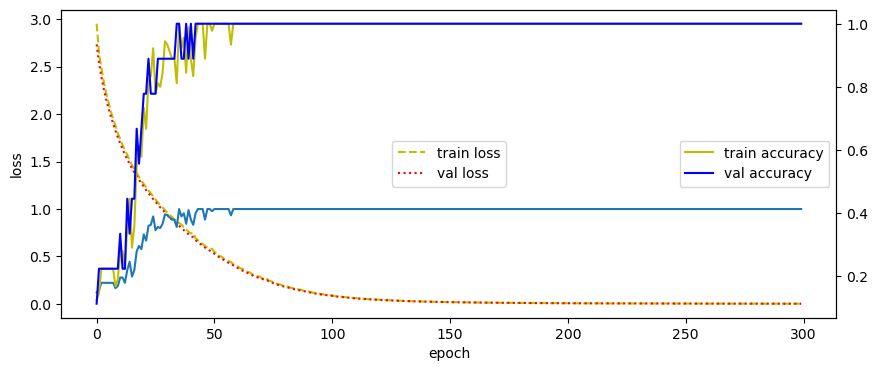

In [17]:
# 학습과정 중의 loss와 accuracy
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize = (10, 4))
loss_ax.plot(hist.history['loss'], 
             'y--', 
             label = 'train loss')
loss_ax.plot(hist.history['val_loss'], 
             'r:', 
             label = 'val loss')

acc_ax = loss_ax.twinx() # loss_ax와 x축을 공유하는 acc_ax 생성

acc_ax.plot(hist.history['accuracy'], 
            'y',
            label = 'train accuracy')
acc_ax.plot(hist.history['val_accuracy'],
            'b',
            label = 'val accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.plot(hist.history['accuracy'])
loss_ax.legend(loc = 'center')
acc_ax.legend(loc = 'center right')
plt.show()

In [19]:
# 모델 평가하기
score = model.evaluate(X_val, Y_val,
                       batch_size = 3)

3/3 [==============================] - 0s 5ms/step - loss: 0.0020 - accuracy: 1.0000


In [20]:
score

[0.0020434323232620955, 1.0]

In [24]:
print('평가된 loss값:', score[0])
print('평가된 accuracy:', score[1]*100, '%')

평가된 loss값: 0.0020434323232620955
평가된 accuracy: 100.0 %


# 7. 모델 사용하기(모델을 사용해서 예측하기)

In [30]:
H = model.predict(np.array([4]))
H

1/1 [==============================] - 0s 30ms/step


array([[1.34811735e-18, 4.90706473e-15, 6.28737151e-16, 1.28301726e-23,
        3.31275288e-07, 1.62962596e-15, 6.69130473e-04, 3.43347041e-21,
        9.98502612e-01, 2.17469442e-27, 8.27991753e-04, 6.34248477e-17,
        2.20410634e-11, 1.32566253e-19, 6.25902806e-19, 8.23961846e-19,
        2.58184959e-30, 1.05019897e-26, 0.00000000e+00]], dtype=float32)

In [31]:
model.predict(np.array([4])).argmax()

1/1 [==============================] - 0s 26ms/step


8

In [32]:
# 몇%의 확률로 분류되었는지
H[0, H.argmax()]

0.9985026

# 7. 모델 저장하기

In [33]:
model.save('model/2_deep_begin.h5')

# 저장된 모델 사용하기

In [8]:
from tensorflow.keras.models import load_model
import numpy as np
model2 = load_model('model/2_deep_begin.h5')

In [12]:
H = model2.predict(np.array([2]))
H

1/1 [==============================] - 0s 24ms/step


array([[3.7421941e-28, 6.7358441e-23, 5.8038824e-04, 4.6645953e-36,
        9.9888998e-01, 7.3077266e-24, 5.2965234e-04, 4.2804861e-30,
        4.9694648e-09, 0.0000000e+00, 2.9344087e-17, 1.0683148e-28,
        5.1536494e-30, 1.7318702e-29, 0.0000000e+00, 9.3423299e-26,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [24]:
# 예측 결과
print(H.argmax())
# 몇 % 확률로 분류되었는지
round(H[0, H.argmax()]*100, 2)

4


99.89